In [53]:
from datasets import CIFAR100

# Load the dataset
dataset = CIFAR100(root='/dev/shm/data/', train=True, download=True)
dataset

Files already downloaded and verified


Dataset CIFAR100
    Number of datapoints: 50000
    Root location: /dev/shm/data/
    Split: Train

In [55]:
dataset.

{'filename': 'meta',
 'key': 'fine_label_names',
 'md5': '7973b15100ade9c7d40fb424638fde48'}

In [6]:
from datasets import OldNoisyCIFAR10, NoisyCIFAR10

# Load the dataset
dataset = NoisyCIFAR10(root='/dev/shm/data/', train=True, download=True, noise_type='asymmetric', noise_rate=0.2)
dataset = OldNoisyCIFAR10(root='/dev/shm/data/', train=True, download=True, noise_type='asymmetric', noise_rate=0.2)


Files already downloaded and verified
True noise rate: 0.1006
Files already downloaded and verified


TypeError: unsupported operand type(s) for &: 'NoneType' and 'bool'

In [4]:
import numpy as np

x = np.random.randint(0, 10, 5)
i = np.array([True, False, True, False, True])
x[i] 

array([4, 7, 7])

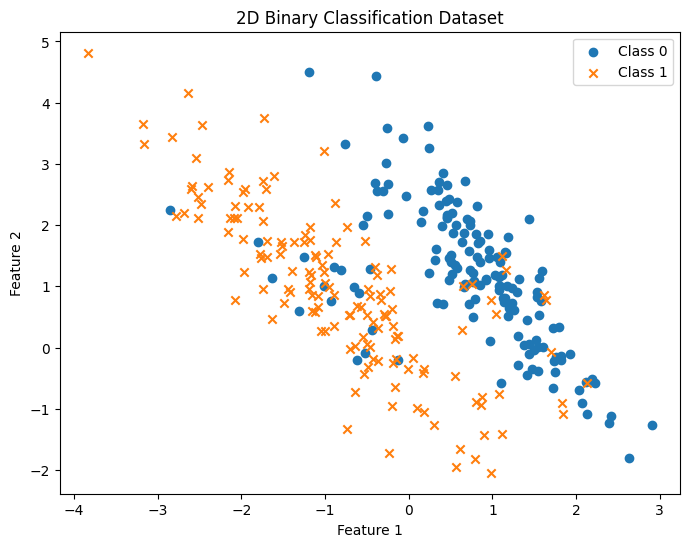

In [16]:
# Importing necessary libraries
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

# Generate a 2D binary classification dataset
X, y = make_classification(
    n_features=2, 
    n_redundant=0, 
    n_informative=2,
    n_clusters_per_class=1, 
    n_classes=2, 
    n_samples=300,
    random_state=3
)

# Calculate the number of labels to flip (20% of the total number of samples)
num_to_flip = int(0.1 * len(y))

# Randomly choose indices to flip
import random
random.seed(42)  # For reproducibility
flip_indices = random.sample(range(len(y)), num_to_flip)

# Flip the labels at the chosen indices
flipped_y = np.copy(y)
for index in flip_indices:
    flipped_y[index] = 1 - flipped_y[index]



# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[flipped_y  == 0][:, 0], X[flipped_y  == 0][:, 1], marker='o', label='Class 0')
plt.scatter(X[flipped_y  == 1][:, 0], X[flipped_y  == 1][:, 1], marker='x', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2D Binary Classification Dataset')
plt.legend()
plt.show()


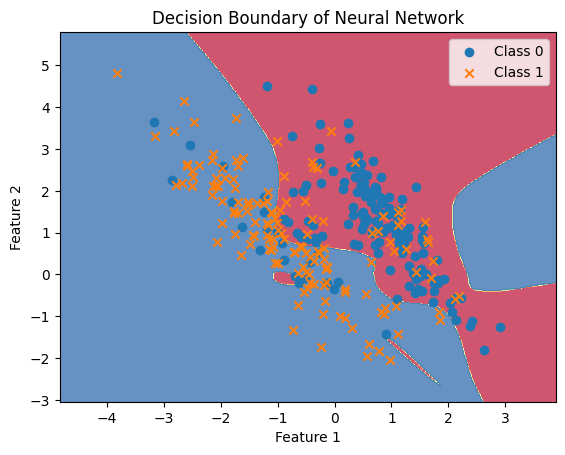

In [52]:
# Re-importing necessary libraries for generating dataset, plotting, and creating neural network
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np
import random

# Re-generate the 2D binary classification dataset
X, y = make_classification(
    n_features=2, 
    n_redundant=0, 
    n_informative=2,
    n_clusters_per_class=1, 
    n_classes=2, 
    n_samples=300,
    random_state=3
)

# Calculate the number of labels to flip (20% of the total number of samples)
num_to_flip = int(0.2 * len(y))

# Randomly choose indices to flip
random.seed(42)  # For reproducibility
flip_indices = random.sample(range(len(y)), num_to_flip)

# Flip the labels at the chosen indices
flipped_y = np.copy(y)
for index in flip_indices:
    flipped_y[index] = 1 - flipped_y[index]

# Create a neural network using scikit-learn's MLPClassifier
# nn = MLPClassifier(hidden_layer_sizes=[100,]*10, max_iter=1000, learning_rate='adaptive', random_state=42)
# nn = MLPClassifier(hidden_layer_sizes=[200,]*5, max_iter=1000, solver='adam', learning_rate='adaptive', random_state=42)
nn = MLPClassifier(hidden_layer_sizes=[1000,]*5, max_iter=1000, solver='adam', learning_rate='adaptive', random_state=42)

# Train the neural network on the dataset with flipped labels
nn.fit(X, flipped_y)

# Function to plot decision boundary
def plot_decision_boundary(model, X, y):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict the function value for the whole grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], marker='o', label='Class 0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='x', label='Class 1')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary of Neural Network')
    plt.legend()
    plt.show()

# Plot the decision boundary
plot_decision_boundary(nn, X, flipped_y)
